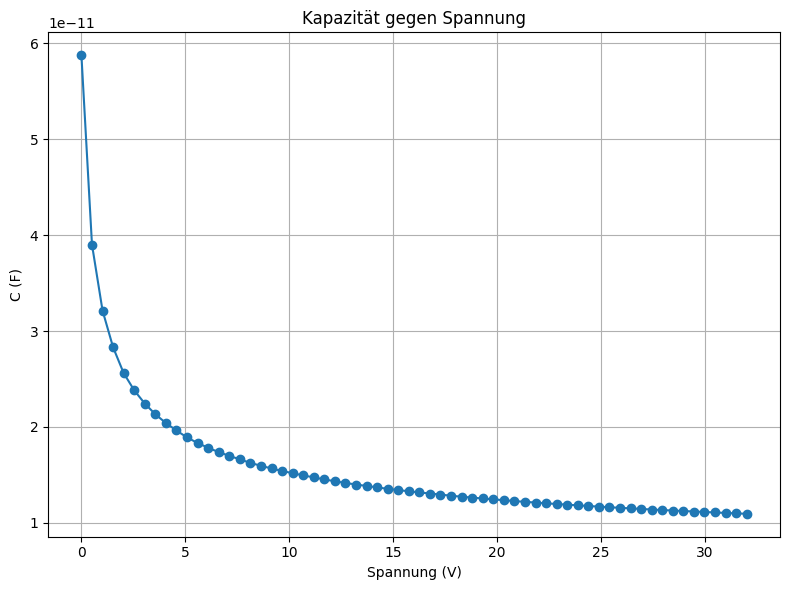

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

file_path = "/Users/rojinaksu/Desktop/data_freq_100000_settle_10_voltage_32_steps_64_with_black_1Mega_20grad.csv"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data_lines = [line for line in lines if not line.startswith('#') and line.strip()]
columns = [
    "timestamp", "bias", "mean_current", "std_current",
    "mean_primary", "std_primary", "mean_secondary", "std_secondary"
]
df = pd.read_csv(StringIO(''.join(data_lines)), names=columns)


df = df[df["mean_primary"] > 0]  # werte ab 0
df["C_pF"] = df["mean_primary"]  
df["C_farad"] = df["C_pF"] #* 1e-12  

# 1/C² 
df["inv_C2"] = 1 / (df["C_pF"] ** 2)


plt.figure(figsize=(8, 6))
plt.plot(df["bias"], df["C_pF"], marker='o')
plt.xlabel("Spannung (V)")
plt.ylabel("C (F)")
plt.title("Kapazität gegen Spannung")
plt.grid(True)
plt.tight_layout()
plt.savefig('CvsU')
plt.show()


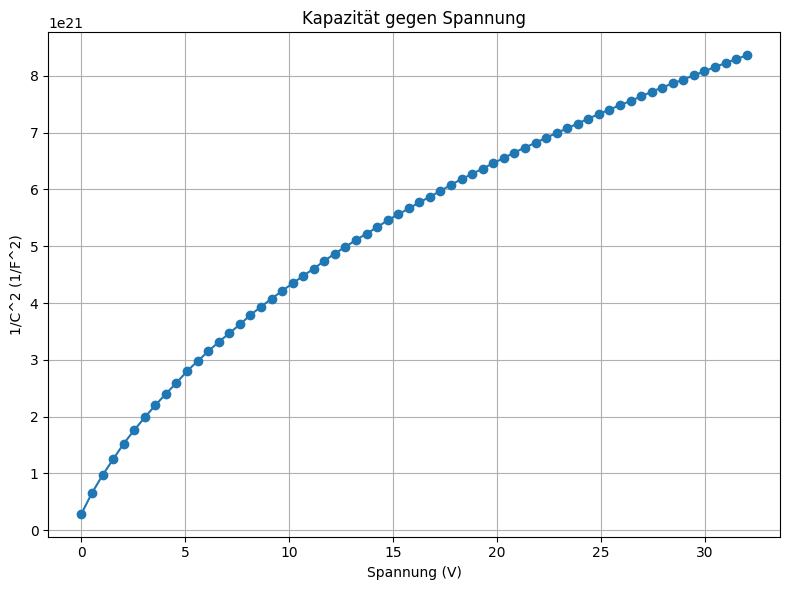

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(df["bias"], df["inv_C2"], marker='o')
plt.xlabel("Spannung (V)")
plt.ylabel("1/C^2 (1/F^2)")
plt.title("Kapazität gegen Spannung")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
df_out = df.copy()
df_out["bias"] = -df_out["bias"]
print(df_out[["bias", "C_pF", "C_farad", "inv_C2"]])


         bias        C_pF   C_farad        inv_C2
0   -0.000000   1461262.0  0.000001  4.683212e+11
1   -0.507937   3526416.0  0.000004  8.041423e+10
2   -1.015873   5266012.0  0.000005  3.606088e+10
3   -1.523810   6858140.0  0.000007  2.126118e+10
4   -2.031746   8326732.0  0.000008  1.442284e+10
..        ...         ...       ...           ...
59 -29.968254  25656680.0  0.000026  1.519144e+09
60 -30.476190  25494120.0  0.000025  1.538580e+09
61 -30.984127  26038480.0  0.000026  1.474921e+09
62 -31.492063  25697220.0  0.000026  1.514355e+09
63 -32.000000  26199020.0  0.000026  1.456901e+09

[64 rows x 4 columns]


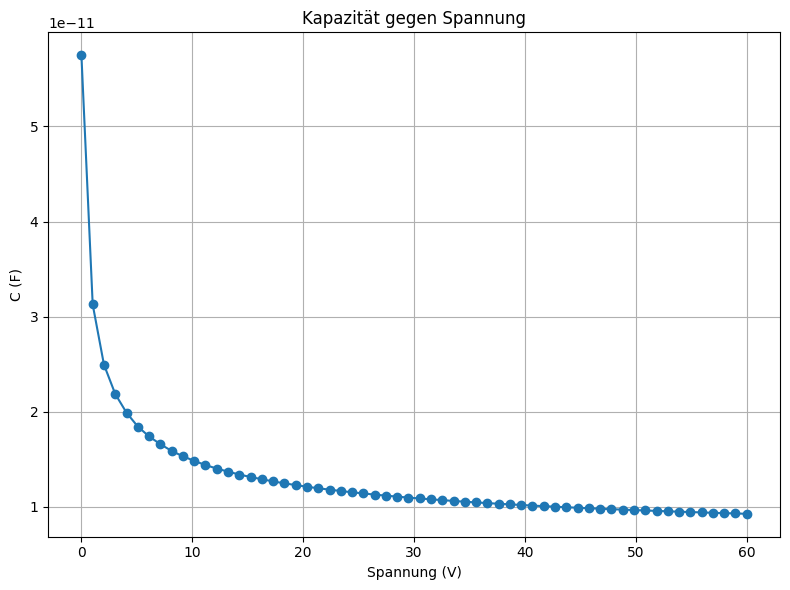

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO


file_path = "//Users/rojinaksu/Desktop/data_freq_100000_settle_10_voltage_60_steps_60_with_black_1Mega_20grad_diode2_16.csv"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data_lines = [line for line in lines if not line.startswith('#') and line.strip()]
columns = [
    "timestamp", "bias", "mean_current", "std_current",
    "mean_primary", "std_primary", "mean_secondary", "std_secondary"
]
df = pd.read_csv(StringIO(''.join(data_lines)), names=columns)


df = df[df["mean_primary"] > 0]  # Nur gültige Werte
df["C_pF"] = df["mean_primary"]  
df["C_farad"] = df["C_pF"] #* 1e-12  


df["inv_C2"] = 1 / (df["C_pF"] ** 2)

plt.figure(figsize=(8, 6))
plt.plot(df["bias"], df["C_pF"], marker='o')
plt.xlabel("Spannung (V)")
plt.ylabel("C (F)")
plt.title("Kapazität gegen Spannung")
plt.grid()
plt.tight_layout()
plt.show()


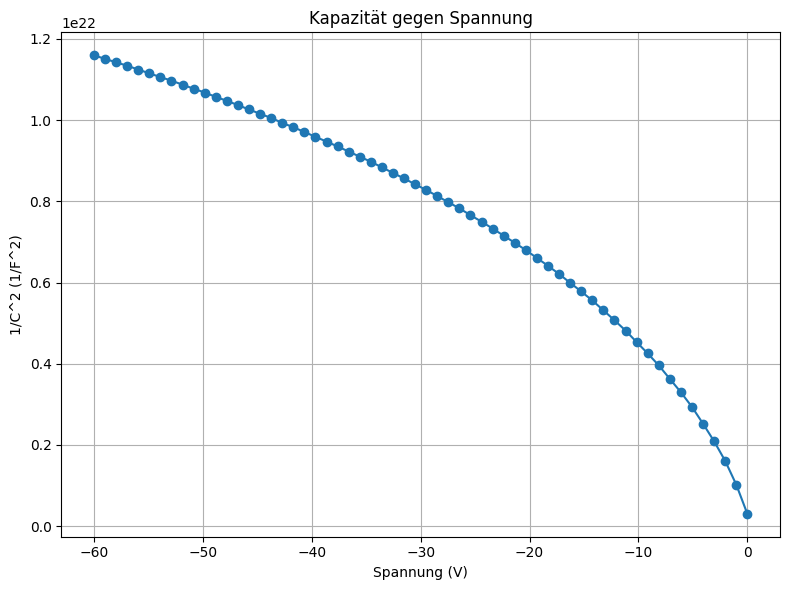

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(-df["bias"], df["inv_C2"], marker='o')
plt.xlabel("Spannung (V)")
plt.ylabel("1/C^2 (1/F^2)")
plt.title("Kapazität gegen Spannung")
plt.grid(True)
plt.tight_layout()
plt.show()

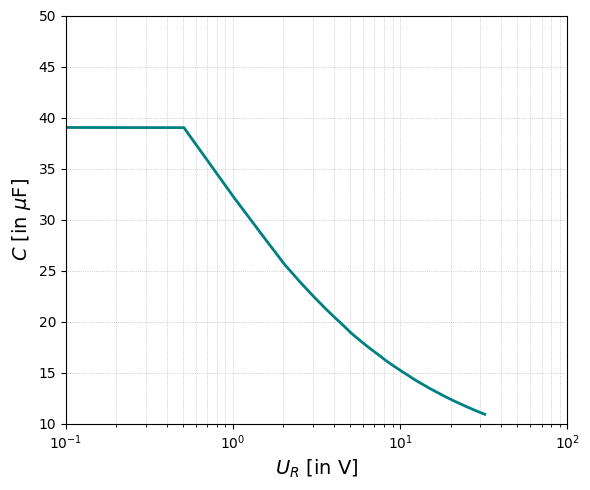

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# CSV einlesen
file_path = "/Users/rojinaksu/Desktop/data_freq_100000_settle_10_voltage_32_steps_64_with_black_1Mega_20grad.csv"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Kommentarzeilen filtern
data_lines = [line for line in lines if not line.startswith('#') and line.strip()]
columns = [
    "timestamp", "bias", "mean_current", "std_current",
    "mean_primary", "std_primary", "mean_secondary", "std_secondary"
]
df = pd.read_csv(StringIO(''.join(data_lines)), names=columns)

# Daten bereinigen und Kapazität berechnen
#df = df[df["mean_primary"] ]
df["C_pF"] = df["mean_primary"] * 10**12 

# Plot
plt.figure(figsize=(6, 5))  # Format wie Datenblatt
plt.semilogx(df["bias"], df["C_pF"], color='teal', linewidth=2)

# Achsenbeschriftungen und Stil
plt.xlabel(r"$U_R$ [in V]", fontsize=14)
plt.ylabel(r"$C$ [in $\mu$F]", fontsize=14)
plt.ylim(10, 50)
plt.xlim(1e-1, 1e2)
plt.grid(True, which="both", linestyle=":", linewidth=0.5)

# Ticks-Design anpassen
plt.xticks([1e-1, 1, 10, 100], labels=[ "$10^{-1}$","$10^0$", "$10^1$", "$10^2$"])
#plt.yticks(np.arange(0, 110, 10))
#plt.title('Kapazität gegen Sperrspannung')
# Layout speichern
plt.tight_layout()
plt.savefig("C_vs_VR_32V.pdf")
plt.show()


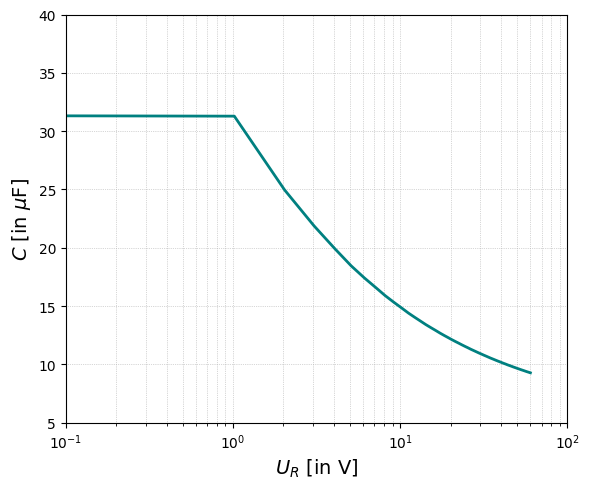

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# CSV einlesen
file_path = "/Users/rojinaksu/Desktop/data_freq_100000_settle_10_voltage_60_steps_60_with_black_1Mega_20grad_diode2_16.csv"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Kommentarzeilen filtern
data_lines = [line for line in lines if not line.startswith('#') and line.strip()]
columns = [
    "timestamp", "bias", "mean_current", "std_current",
    "mean_primary", "std_primary", "mean_secondary", "std_secondary"
]
df = pd.read_csv(StringIO(''.join(data_lines)), names=columns)

# Daten bereinigen und Kapazität berechnen
#df = df[df["mean_primary"] ]
df["C_pF"] = df["mean_primary"] * 10**12 

# Plot
plt.figure(figsize=(6, 5))  # Format wie Datenblatt
plt.semilogx(df["bias"], df["C_pF"], color='teal', linewidth=2)

# Achsenbeschriftungen und Stil
plt.xlabel(r"$U_R$ [in V]", fontsize=14)
plt.ylabel(r"$C$ [in $\mu$F]", fontsize=14)
plt.ylim(5, 40)
plt.xlim(1e-1, 1e2)
plt.grid(True, which="both", linestyle=":", linewidth=0.5)

# Ticks-Design anpassen
plt.xticks([1e-1, 1, 10, 100], labels=[ "$10^{-1}$","$10^0$", "$10^1$", "$10^2$"])
#plt.yticks(np.arange(0, 110, 10))
#plt.title('Kapazität gegen Sperrspannung')
# Layout speichern
plt.tight_layout()
plt.savefig("C_vs_VR_60V.pdf")
plt.show()

In [5]:
epsilon_0 = 8.854e-12  # F/m
epsilon_r = 11.7
A = 7.02e-6  # m²

# C in Farad
df["C_farad"] = df["C_pF"] * 1e-12

# Verarmungstiefe in m
df["depletion_depth_m"] = (epsilon_0 * epsilon_r * A) / df["C_farad"]

# Umrechnen in µm
df["depletion_depth_um"] = df["depletion_depth_m"] * 1e6




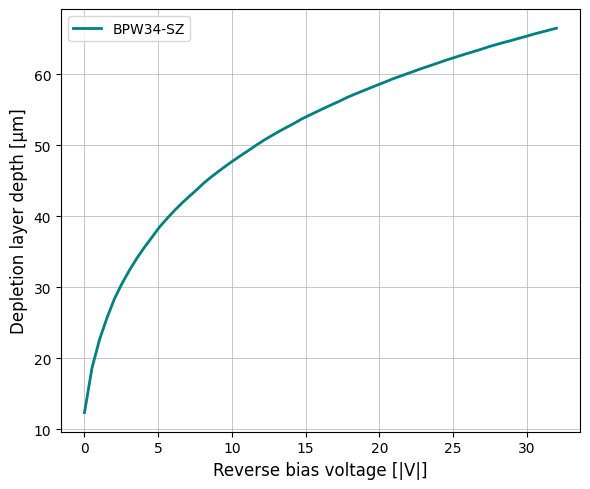

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

#file_path = "/Users/rojinaksu/Desktop/data_freq_100000_settle_10_voltage_60_steps_60_with_black_1Mega_20grad_diode2_16.csv"
file_path = "/Users/rojinaksu/Desktop/data_freq_100000_settle_10_voltage_32_steps_64_with_black_1Mega_20grad.csv"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Kommentare entfernen
data_lines = [line for line in lines if not line.startswith('#') and line.strip()]
columns = [
    "timestamp", "bias", "mean_current", "std_current",
    "mean_primary", "std_primary", "mean_secondary", "std_secondary"
]
df = pd.read_csv(StringIO(''.join(data_lines)), names=columns)

# Nur gültige Kapazitätswerte
#df = df[df["mean_primary"] > 0]
df["C_pF"] = df["mean_primary"]

# Konstanten für Berechnung
epsilon_0 = 8.854e-12  # F/m
epsilon_r = 11.7
A = 7.02e-6  # m²

# Berechnung der Verarmungstiefe
df["C_farad"] = df["C_pF"] #* 1e-12
df["depletion_depth_um"] = (epsilon_0 * epsilon_r * A / df["C_farad"]) * 1e6  # in µm

# Sortieren für saubere Plotlinie
df = df.sort_values("bias")

# Plot im Stil des neuen Beispiels
plt.figure(figsize=(6, 5))
plt.plot(df["bias"], df["depletion_depth_um"], color='teal', label="BPW34-SZ", linewidth=2)
plt.xlabel("Reverse bias voltage [|V|]", fontsize=12)
plt.ylabel("Depletion layer depth [µm]", fontsize=12)
#plt.title('Depletion layer depth gegen Reversed bias voltage')
plt.grid(True, which="both", linestyle="-", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("depletion_depth_vs_bias_linear.pdf")
plt.show()


In [11]:
# Kapazität und Fehler in Farad
df["C_farad"] = df["C_pF"]  # falls schon in Farad, sonst * 1e-12
df["C_error"] = df["std_primary"]

# Schichttiefe und zugehöriger Fehler
df["depletion_depth_um"] = (epsilon_0 * epsilon_r * A / df["C_farad"]) * 1e6
df["depletion_depth_um_error"] = (epsilon_0 * epsilon_r * A / df["C_farad"]**2) * df["C_error"] * 1e6


print(depth_err)


0.004846461157520389


In [8]:
depth = np.interp(6.85, df["bias"], df["depletion_depth_um"])
depth_err = np.interp(6.85, df["bias"], df["depletion_depth_um_error"])
print(f"Depletion depth bei 6.85 V: {depth:.2f} ± {depth_err:.2f} µm")




Depletion depth bei 6.85 V: 42.33 ± 0.00 µm


In [9]:
print(f"d = {depth:.2f} ± {depth_err*1000:.1f} nm")



d = 42.33 ± 4.8 nm


In [10]:
print(f"d = {depth:.2f} ± {depth_err:.4f} µm")



d = 42.33 ± 0.0048 µm
